In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib

In [2]:
df = pd.read_csv('Salary_Data_simple.csv')
df 

,Experience,Salary
0,1.0,0.0
1,1.5,0.0
2,2.0,0.0
3,2.5,0.0
4,3.0,60.0
5,3.5,64.0
6,4.0,55.0
7,4.5,61.0
8,5.0,66.0
9,5.5,83.0


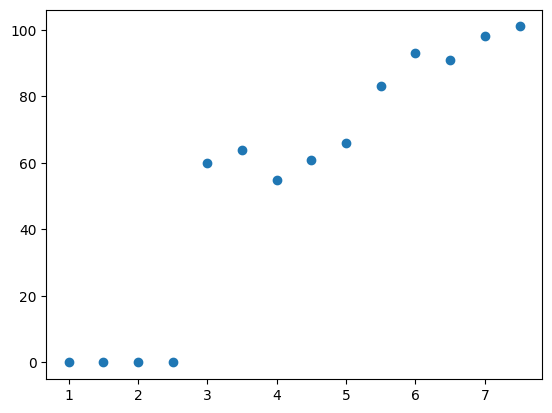

In [3]:
plt.scatter(x = df['Experience'], y=df['Salary'])

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=4)
y_test

4    60.0
Name: Salary, dtype: float64

In [5]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [7]:
y_pred_train = dt_regressor.predict(X)
r2_score(X, y)

-951.5406593406593

In [8]:
y_pred = dt_regressor.predict(X_test)
r2_score(y_test, y_pred)

c:\Users\vomin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [9]:
from sklearn import tree 

text_representation = tree.export_text(dt_regressor)
print(text_representation)

|--- feature_0 <= 2.75
|   |--- value: [0.00]
|--- feature_0 >  2.75
|   |--- feature_0 <= 5.25
|   |   |--- value: [61.20]
|   |--- feature_0 >  5.25
|   |   |--- value: [93.20]



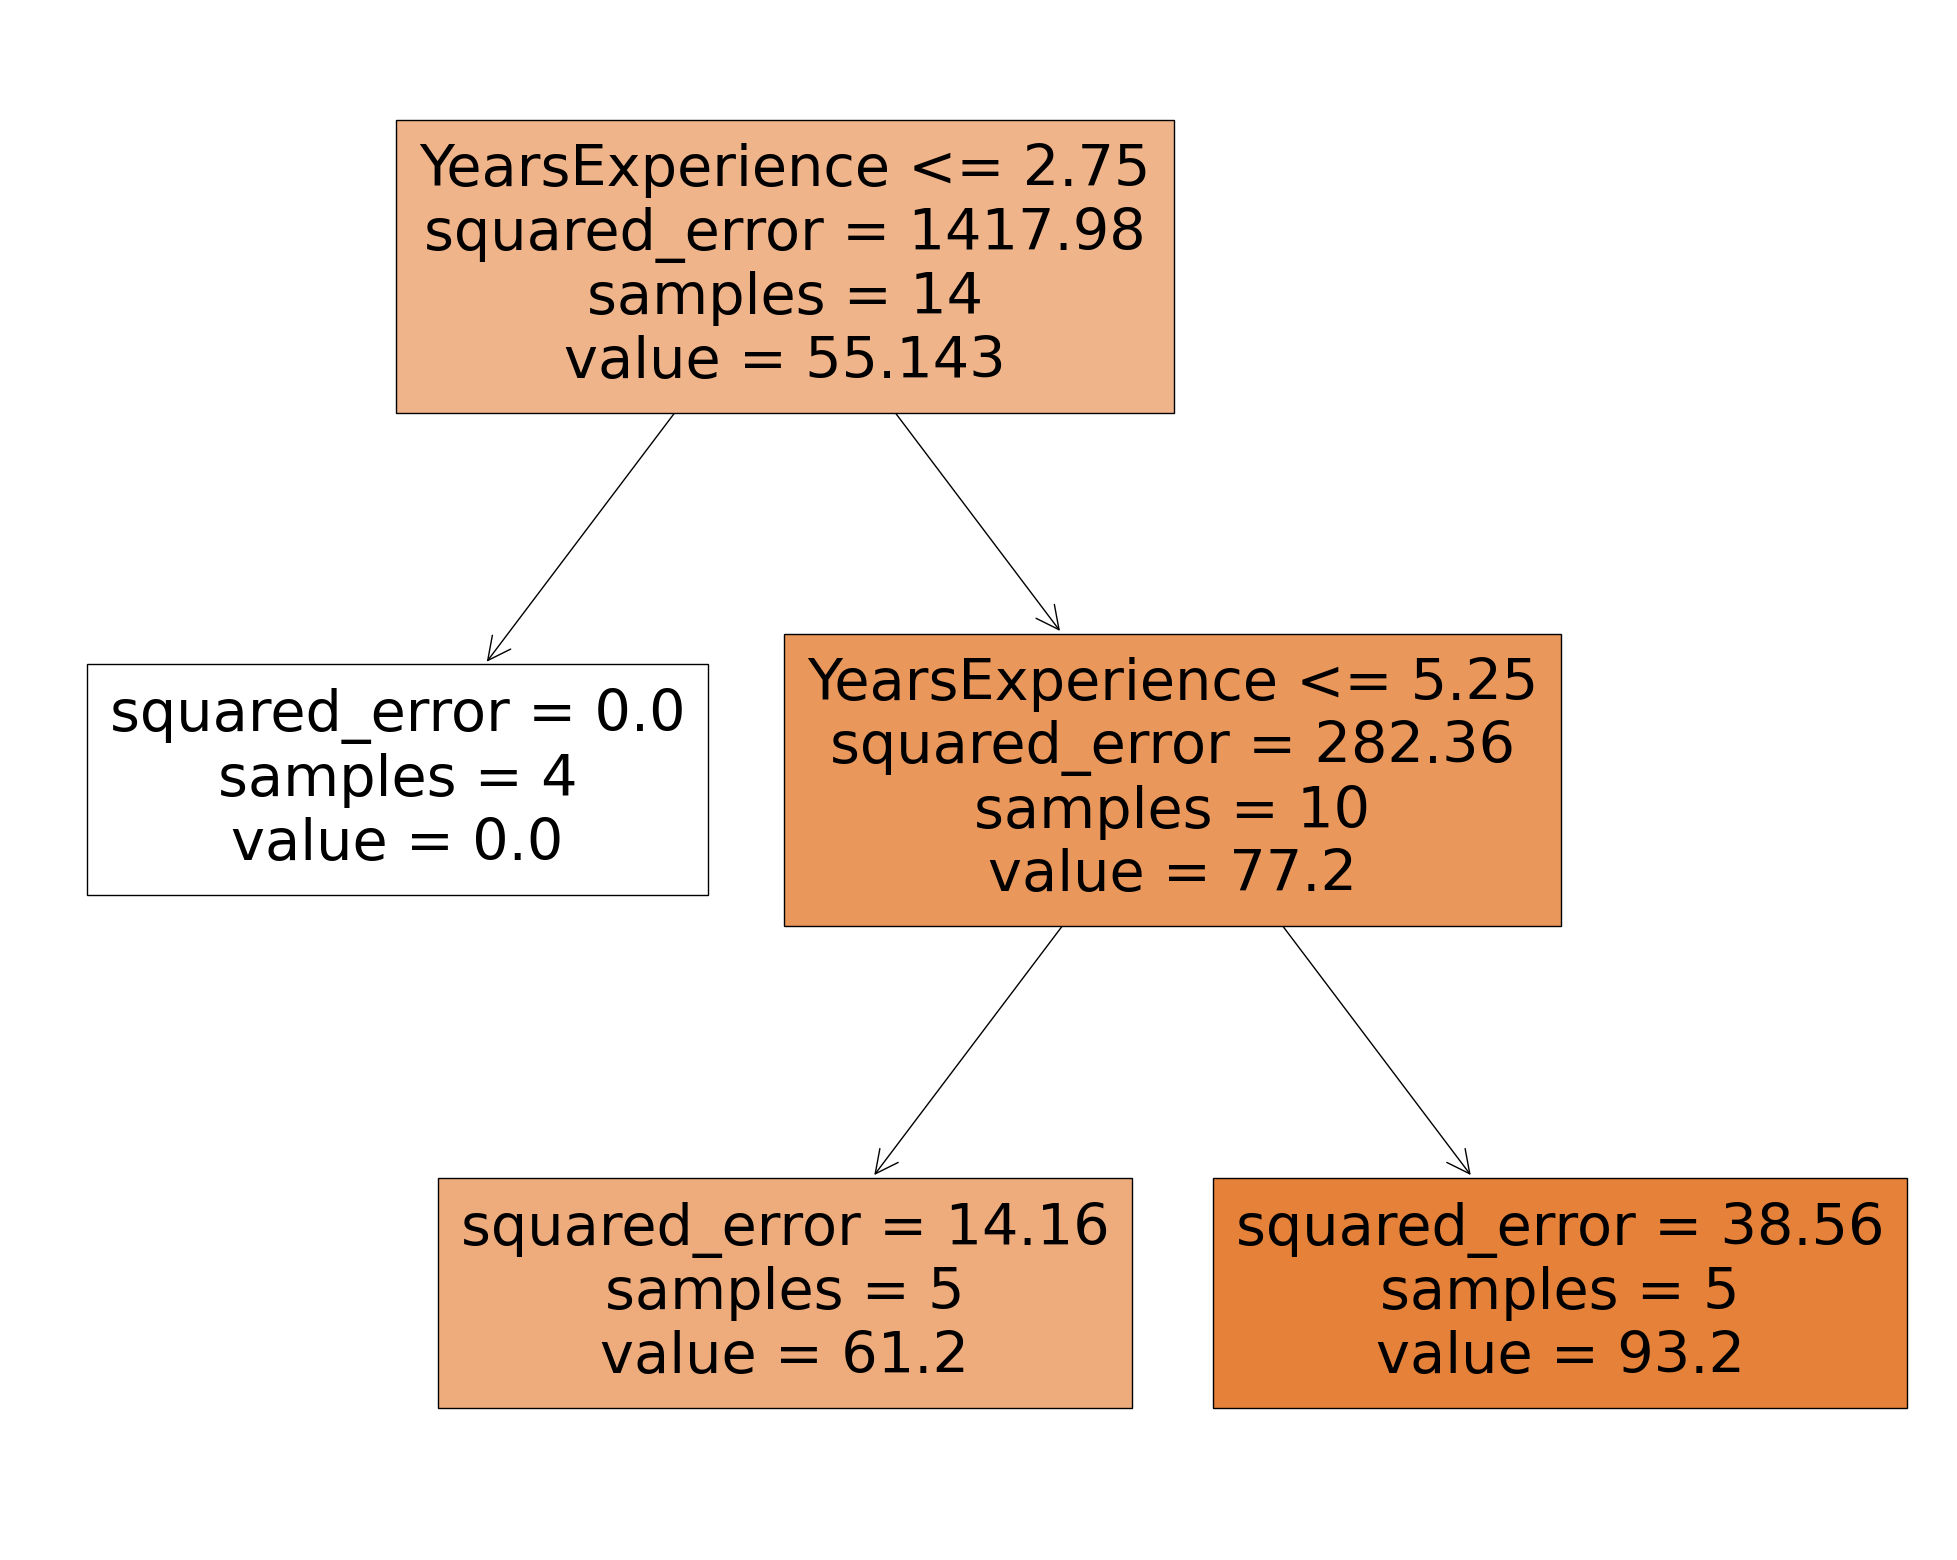

In [10]:
fit = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_regressor, feature_names=['YearsExperience'], filled=True)

In [12]:
import dtreeviz

viz = dtreeviz.model(dt_regressor, X, y,
                     target_name="target",
                     feature_names=['YearsExperience'])
v = viz.view()
# v.show()

c:\Users\vomin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


c:\Users\vomin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


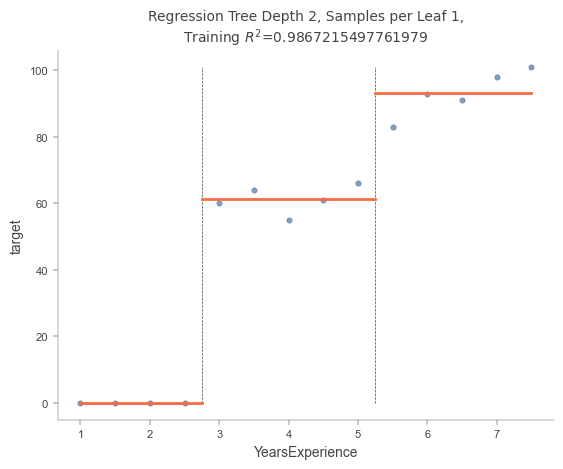

In [13]:
viz.rtree_feature_space(features=['YearsExperience'])

## Verify

In [14]:
data = y.to_numpy()
data 

array([  0.,   0.,   0.,   0.,  60.,  64.,  55.,  61.,  66.,  83.,  93.,
        91.,  98., 101.])

In [15]:
def compute_mse(data):
    data_mean = data.mean()
    diff = (data - data_mean)**2
    mse = diff.sum()/data.size
    return mse 

for i in range(1, 14):
    print(f'for i={i}')
    left = data[:i]
    right = data[i:]
    print(left, 'mse:', compute_mse(left), '     mean:', left.mean())
    print(right, 'mse:', compute_mse(right), '      mean:',right.mean())
    average_mse = compute_mse(left)*(left.size/data.size) + compute_mse(right)*(right.size/data.size)
    print('average_mse:', average_mse)

    print('\n')

for i=1
[0.] mse: 0.0      mean: 0.0
[  0.   0.   0.  60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 1275.1597633136096       mean: 59.38461538461539
average_mse: 1184.0769230769233


for i=2
[0. 0.] mse: 0.0      mean: 0.0
[  0.   0.  60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 1063.0555555555557       mean: 64.33333333333333
average_mse: 911.1904761904763


for i=3
[0. 0. 0.] mse: 0.0      mean: 0.0
[  0.  60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 749.2396694214876       mean: 70.18181818181819
average_mse: 588.6883116883117


for i=4
[0. 0. 0. 0.] mse: 0.0      mean: 0.0
[ 60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 282.35999999999996       mean: 77.2
average_mse: 201.68571428571425


for i=5
[ 0.  0.  0.  0. 60.] mse: 576.0      mean: 12.0
[ 64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 277.20987654320993       mean: 79.11111111111111
average_mse: 383.92063492063494


for i=6
[ 0.  0.  0.  0. 60. 64.] mse: 855.5555555555553      mean: 

In [16]:
left.size/data.size 

0.9285714285714286

In [17]:
y_mean = y.mean()
print('Mean:', y_mean)

diff = (y - y_mean)**2
mse = diff.sum()/14
print('mse:', mse)

Mean: 55.142857142857146
mse: 1417.9795918367347
